In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# THỐNG KÊ VÀ CÁC YẾU TỐ ẢNH HƯỞNG ĐẾN CHẤT LƯỢNG DỊCH VỤ TẠI CANTEEN TRƯỜNG ĐẠI HỌC CÔNG NGHIỆP TPHCM (IUH) CỦA 0 NGƯỜI

In [3]:



df=pd.read_excel('bai2.xlsx')
df.head(5)


,Name,StudentID,Sex,Đồ ăn hấp dẫn tươi ngon,Quy trình xử lý thực ăn chuẩn vệ sinh an toàn,Giá cả chất lượng phù hợp với sinh viên,Nhân viên hỗ trợ tốt,Không gian không khí âm thanh tốt,Thực đơn thay đổi thường xuyên,Thời gian chờ đợi hợp lý,Hình thức thanh toán phù hợp,Yếu tố hài lòng dịch vụ,Điều cần cải thiện,Đề xuất cải tiến
0,Phan Khánh Khoa,23673611,Nam,4,5,4,5,3,1,5,5,chất lượng,giá cả,không có
1,Hoa Hồng Ngân,22721611,Nữ,4,5,4,4,5,4,3,5,đa dạng ẩm thực,nhiệt độ,lắp điều hòa
2,Nguyễn Hoàng Minh Quân,23682001,Nam,4,5,5,4,5,3,4,5,đồ ăn ngon,nhiệt độ,không có
3,Đoàn Thị Thảo Nguyên,23643181,Nữ,5,4,5,5,4,5,5,5,giá hợp lý,nhiệt độ,không có
4,Lê Nhật Tân,23668971,Nam,3,3,4,4,4,3,5,5,nhân viên nhiệt tình,giá cả,giá rẻ hơn


## -Các mô tả cơ bản về dữ liệu :


In [4]:
#mo ta ve du lieu
print('Số lượng khảo sát:',df.shape[0])
print('Số lượng trường dữ liệu:',df.shape[1])


Số lượng khảo sát: 50
Số lượng trường dữ liệu: 14


In [5]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Name                                           50 non-null     object
 1   StudentID                                      50 non-null     int64 
 2   Sex                                            50 non-null     object
 3   Đồ ăn hấp dẫn tươi ngon                        50 non-null     int64 
 4   Quy trình xử lý thực ăn chuẩn vệ sinh an toàn  50 non-null     int64 
 5   Giá cả chất lượng phù hợp với sinh viên        50 non-null     int64 
 6   Nhân viên hỗ trợ tốt                           50 non-null     int64 
 7   Không gian không khí âm thanh tốt              50 non-null     int64 
 8   Thực đơn thay đổi thường xuyên                 50 non-null     int64 
 9   Thời gian chờ đợi hợp lý                       50 non-null     int6

In [6]:
#diem trung binh moi tieu chi
cot = [
    'Đồ ăn hấp dẫn tươi ngon',
    'Quy trình xử lý thực ăn chuẩn vệ sinh an toàn',
    'Giá cả chất lượng phù hợp với sinh viên',
    'Nhân viên hỗ trợ tốt',
    'Không gian không khí âm thanh tốt',
    'Thực đơn thay đổi thường xuyên',
    'Thời gian chờ đợi hợp lý',
    'Hình thức thanh toán phù hợp'
]
df[cot].mean().sort_values()

Giá cả chất lượng phù hợp với sinh viên          3.24
Đồ ăn hấp dẫn tươi ngon                          3.48
Thực đơn thay đổi thường xuyên                   3.52
Thời gian chờ đợi hợp lý                         3.58
Quy trình xử lý thực ăn chuẩn vệ sinh an toàn    3.60
Không gian không khí âm thanh tốt                3.62
Nhân viên hỗ trợ tốt                             3.78
Hình thức thanh toán phù hợp                     4.52
dtype: float64

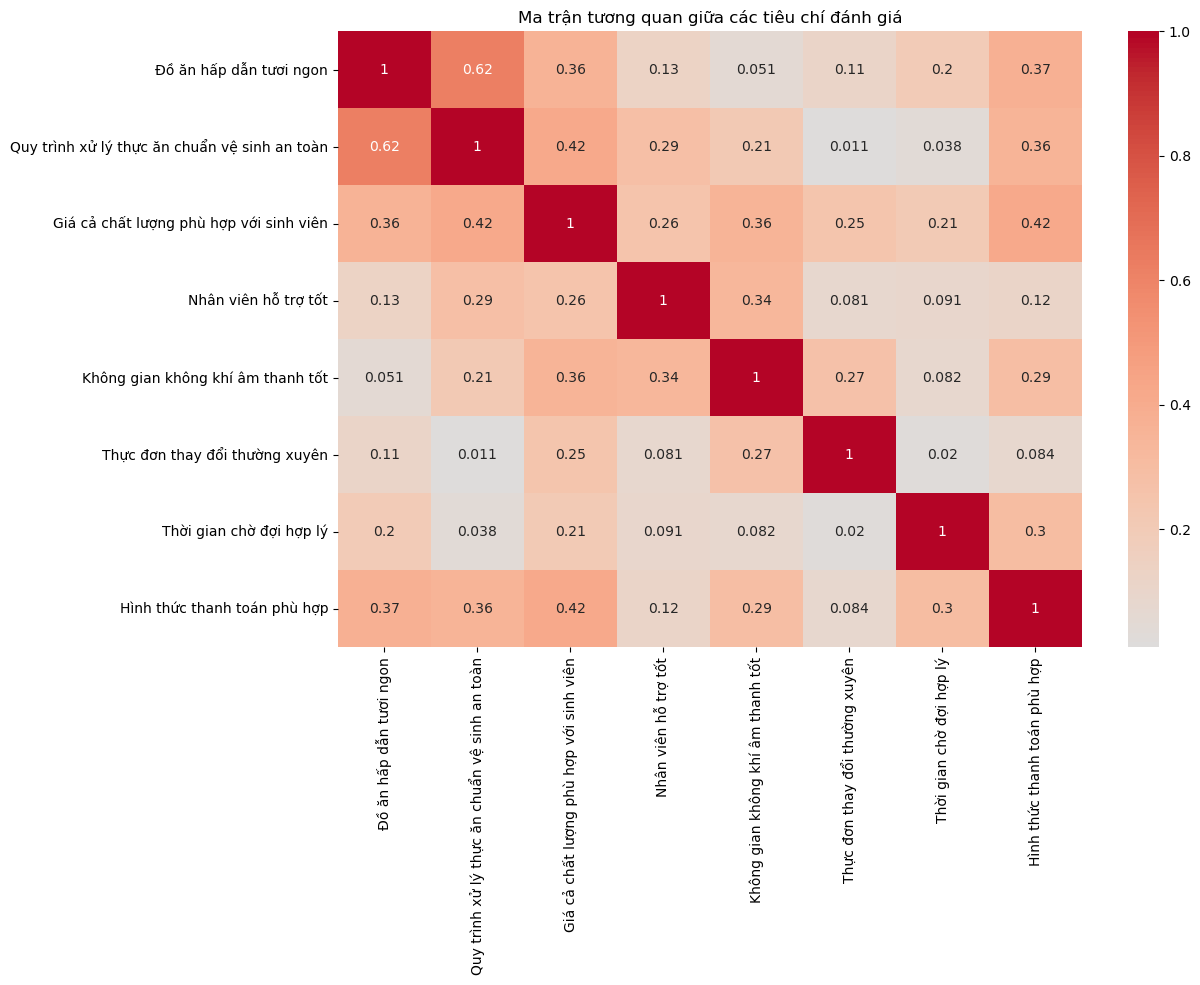

In [7]:
# Danh sách các tiêu chí đánh giá
rating_columns = [
    'Đồ ăn hấp dẫn tươi ngon',
    'Quy trình xử lý thực ăn chuẩn vệ sinh an toàn',
    'Giá cả chất lượng phù hợp với sinh viên',
    'Nhân viên hỗ trợ tốt',
    'Không gian không khí âm thanh tốt',
    'Thực đơn thay đổi thường xuyên',
    'Thời gian chờ đợi hợp lý',
    'Hình thức thanh toán phù hợp'
]

# Phân tích tương quan giữa các tiêu chí
plt.figure(figsize=(12, 8))
sns.heatmap(df[rating_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các tiêu chí đánh giá')
plt.show()



In [8]:
# Phân tích điểm trung bình các tiêu chí
print('Điểm trung bình của từng yếu tố:')
mean_ratings = df[rating_columns].mean().sort_values(ascending=False)
mean_ratings

Điểm trung bình của từng yếu tố:


Hình thức thanh toán phù hợp                     4.52
Nhân viên hỗ trợ tốt                             3.78
Không gian không khí âm thanh tốt                3.62
Quy trình xử lý thực ăn chuẩn vệ sinh an toàn    3.60
Thời gian chờ đợi hợp lý                         3.58
Thực đơn thay đổi thường xuyên                   3.52
Đồ ăn hấp dẫn tươi ngon                          3.48
Giá cả chất lượng phù hợp với sinh viên          3.24
dtype: float64

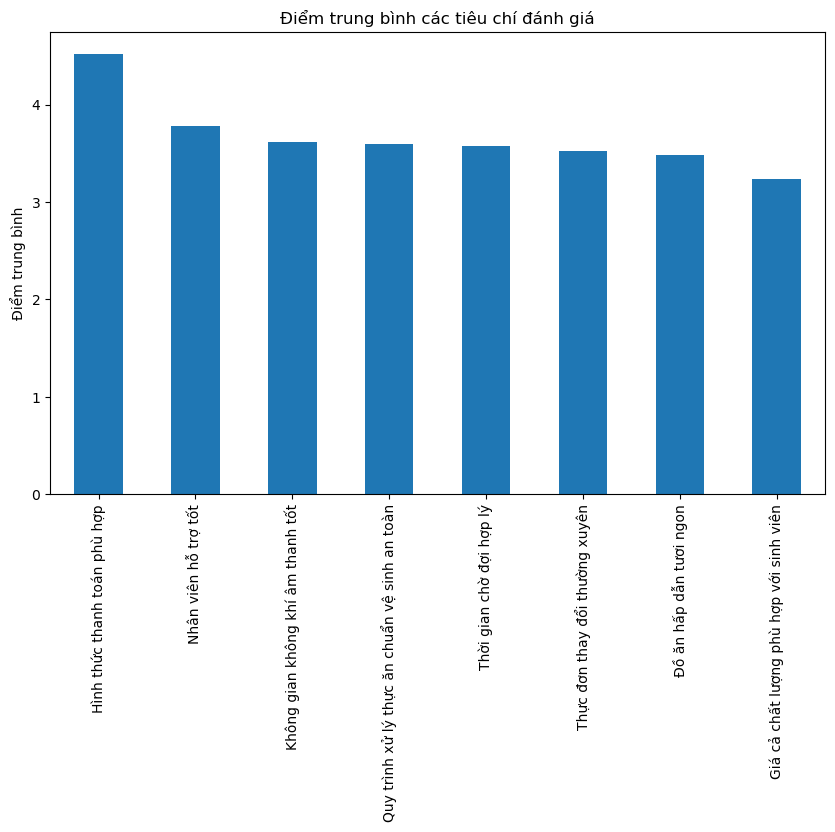

In [9]:

mean_ratings.plot(kind='bar', figsize=(10, 6), title='Điểm trung bình các tiêu chí đánh giá')
plt.ylabel('Điểm trung bình')
plt.show()

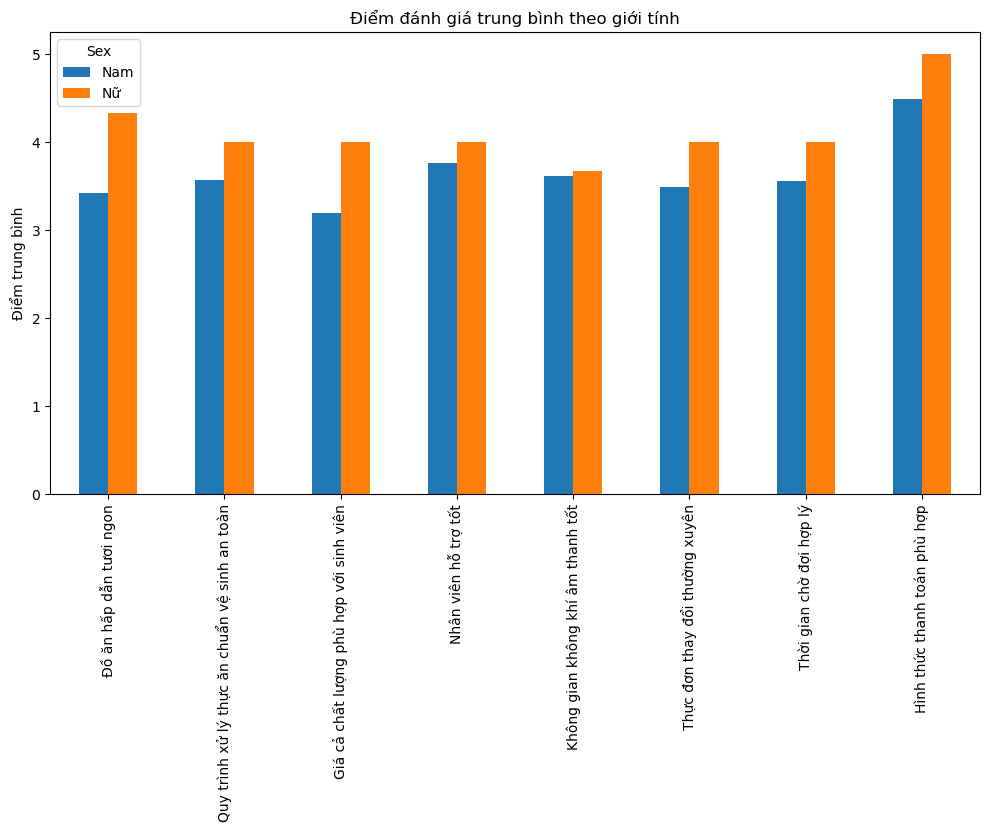

In [10]:
# Phân tích theo giới tính
gender_analysis = df.groupby('Sex')[rating_columns].mean().T
gender_analysis.plot(kind='bar', figsize=(12, 6), title='Điểm đánh giá trung bình theo giới tính')
plt.ylabel('Điểm trung bình')
plt.show()

In [11]:
# Tính tần suất cho từng cột
last_three_cols = df.columns[-3:]
value_counts = {}
for col in last_three_cols:
    value_counts[col] = df[col].value_counts()

# Hiển thị kết quả
for col, counts in value_counts.items():
    print(f"\nTần suất giá trị trong cột '{col}':")
    print(counts)


Tần suất giá trị trong cột 'Yếu tố hài lòng dịch vụ':
Yếu tố hài lòng dịch vụ
đồ ăn ngon              15
nhân viên nhiệt tình    15
đa dạng ẩm thực          7
giá hợp lý               3
cơ sở vật chất           3
vệ sinh                  2
thanh toán tiện          2
sạch sẽ                  2
chất lượng               1
Name: count, dtype: int64

Tần suất giá trị trong cột 'Điều cần cải thiện':
Điều cần cải thiện
không gian    14
giá cả        12
nhiệt độ      10
vật chất       6
không có       4
không khí      3
thang máy      1
Name: count, dtype: int64

Tần suất giá trị trong cột 'Đề xuất cải tiến':
Đề xuất cải tiến
không có                   18
mở rộng phạm vi            13
lắp điều hòa               10
giá rẻ hơn                  2
đa dạng menu                2
tăng cường giờ cao điểm     2
cải thiện không gian        1
nâng cấp vật chất           1
cải tiến phòng gym          1
Name: count, dtype: int64


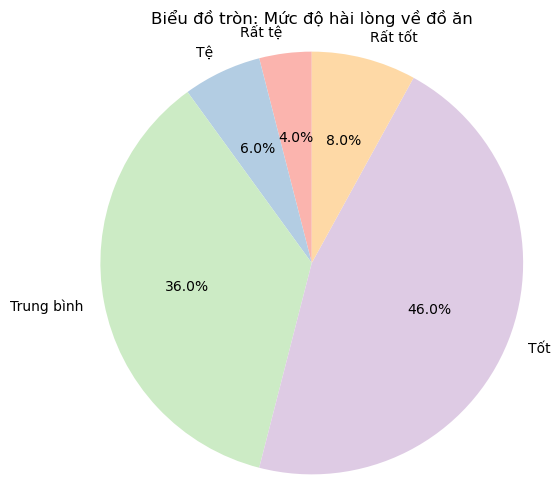

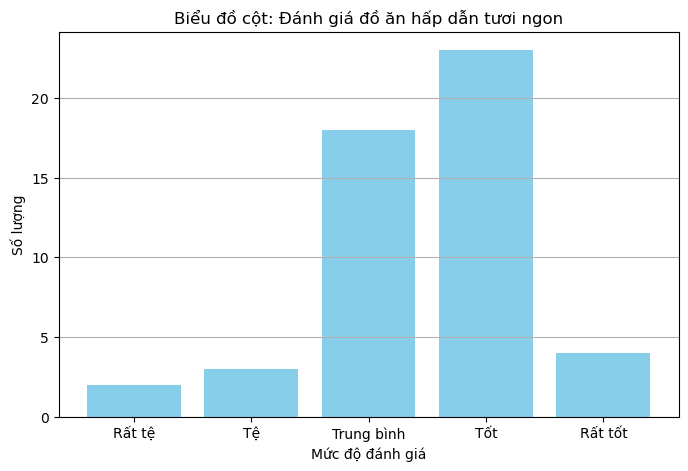

In [13]:

df['Đồ ăn hấp dẫn tươi ngon'] = pd.to_numeric(df['Đồ ăn hấp dẫn tươi ngon'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Đồ ăn hấp dẫn tươi ngon'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Mức độ hài lòng về đồ ăn")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Đánh giá đồ ăn hấp dẫn tươi ngon")
plt.grid(axis='y')
plt.show()


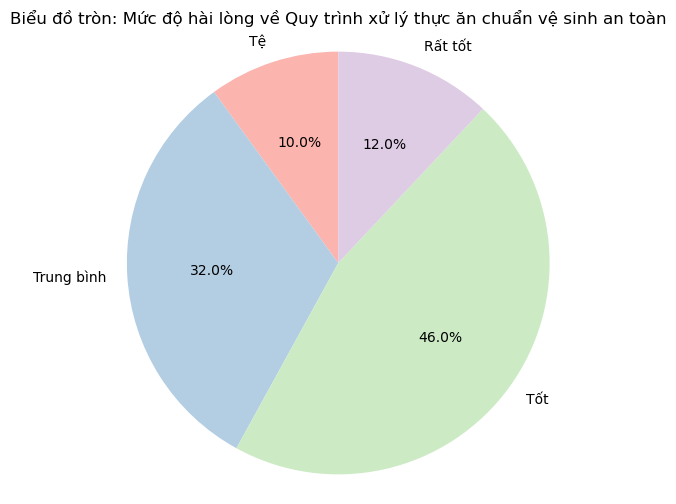

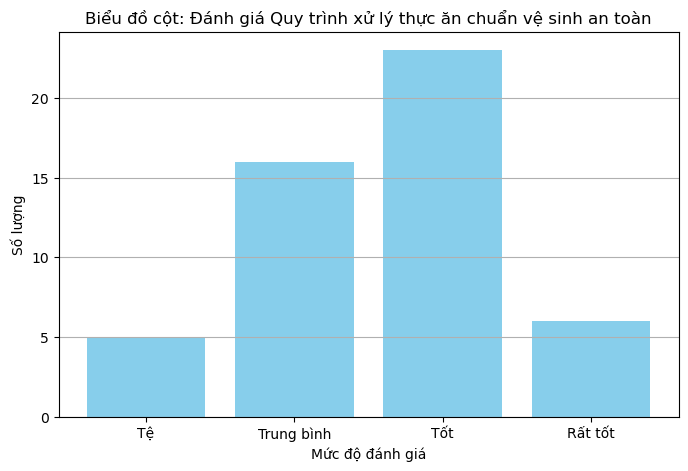

In [14]:

df['Quy trình xử lý thực ăn chuẩn vệ sinh an toàn'] = pd.to_numeric(df['Quy trình xử lý thực ăn chuẩn vệ sinh an toàn'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Quy trình xử lý thực ăn chuẩn vệ sinh an toàn'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Mức độ hài lòng về Quy trình xử lý thực ăn chuẩn vệ sinh an toàn")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Đánh giá Quy trình xử lý thực ăn chuẩn vệ sinh an toàn")
plt.grid(axis='y')
plt.show()


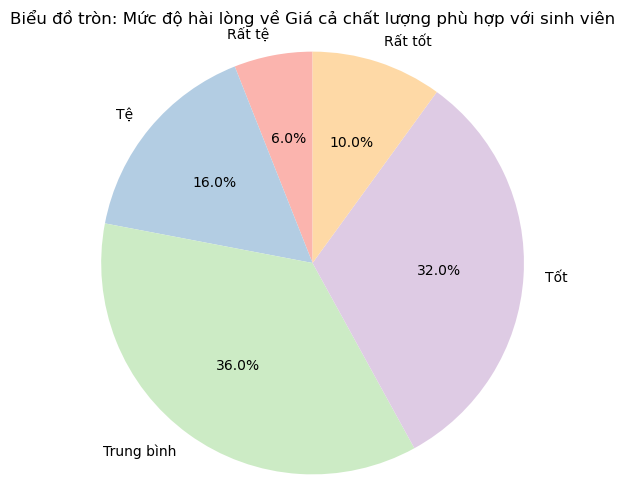

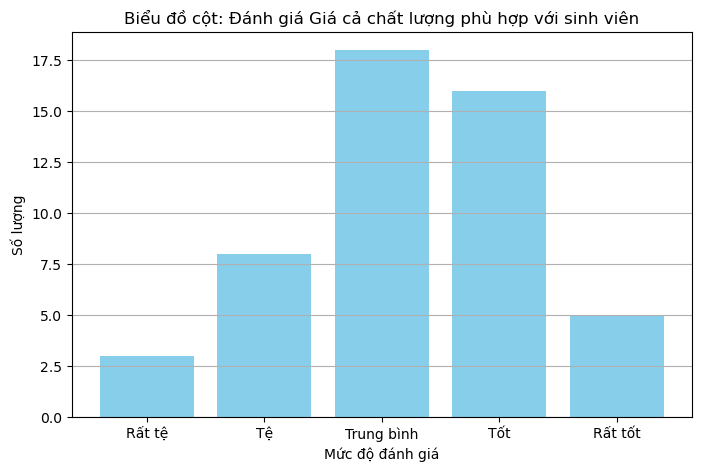

In [15]:

df['Giá cả chất lượng phù hợp với sinh viên'] = pd.to_numeric(df['Giá cả chất lượng phù hợp với sinh viên'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Giá cả chất lượng phù hợp với sinh viên'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Mức độ hài lòng về Giá cả chất lượng phù hợp với sinh viên")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Đánh giá Giá cả chất lượng phù hợp với sinh viên")
plt.grid(axis='y')
plt.show()


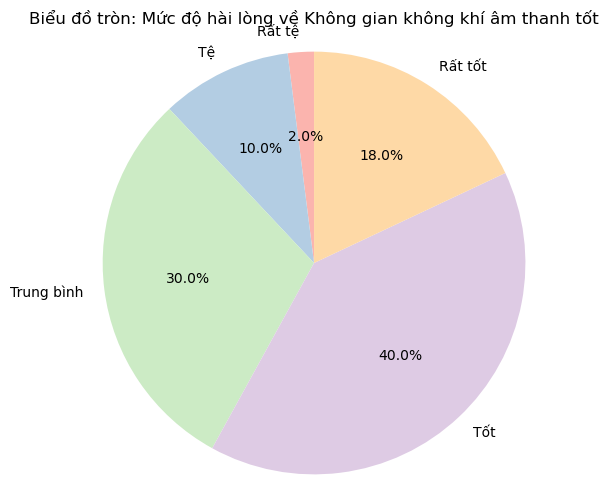

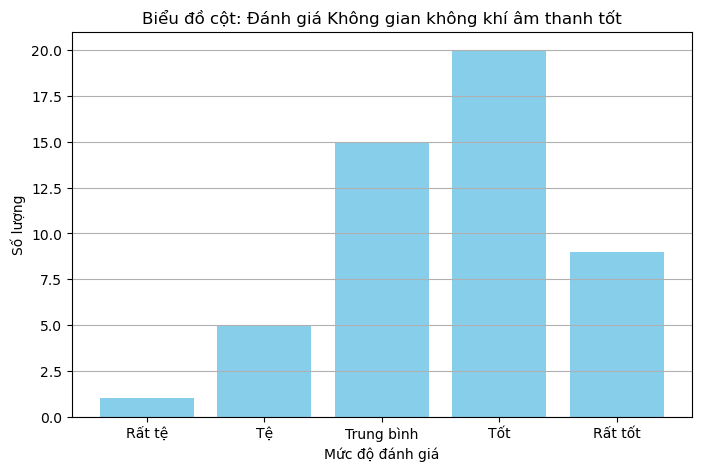

In [17]:

df['Không gian không khí âm thanh tốt'] = pd.to_numeric(df['Không gian không khí âm thanh tốt'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Không gian không khí âm thanh tốt'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Mức độ hài lòng về Không gian không khí âm thanh tốt")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Đánh giá Không gian không khí âm thanh tốt")
plt.grid(axis='y')
plt.show()


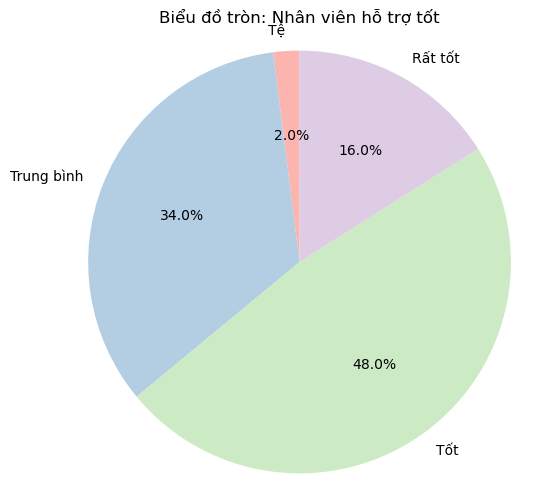

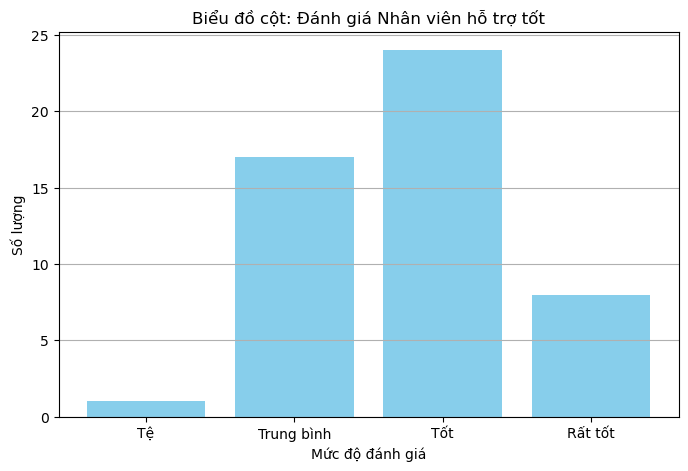

In [18]:

df['Nhân viên hỗ trợ tốt'] = pd.to_numeric(df['Nhân viên hỗ trợ tốt'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Nhân viên hỗ trợ tốt'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Nhân viên hỗ trợ tốt")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Đánh giá Nhân viên hỗ trợ tốt")
plt.grid(axis='y')
plt.show()


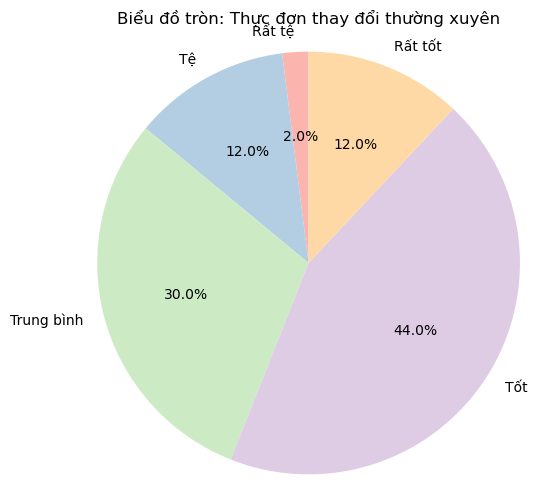

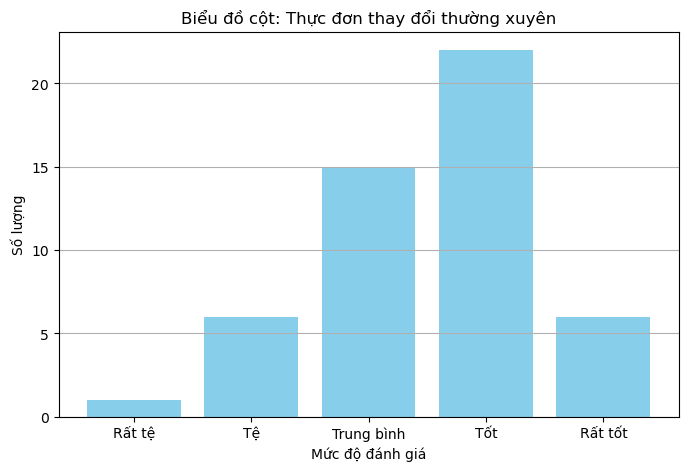

In [19]:

df['Thực đơn thay đổi thường xuyên'] = pd.to_numeric(df['Thực đơn thay đổi thường xuyên'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Thực đơn thay đổi thường xuyên'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Thực đơn thay đổi thường xuyên")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Thực đơn thay đổi thường xuyên")
plt.grid(axis='y')
plt.show()


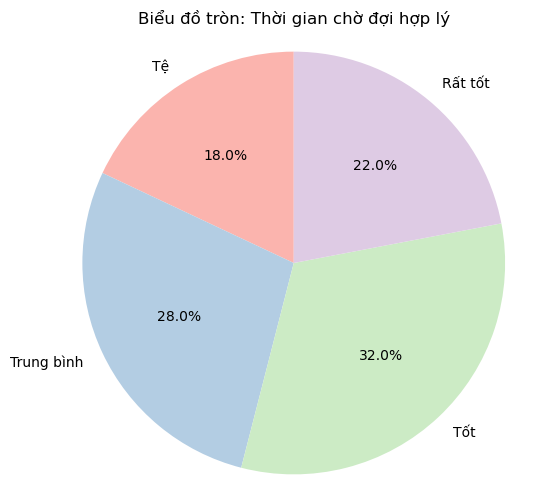

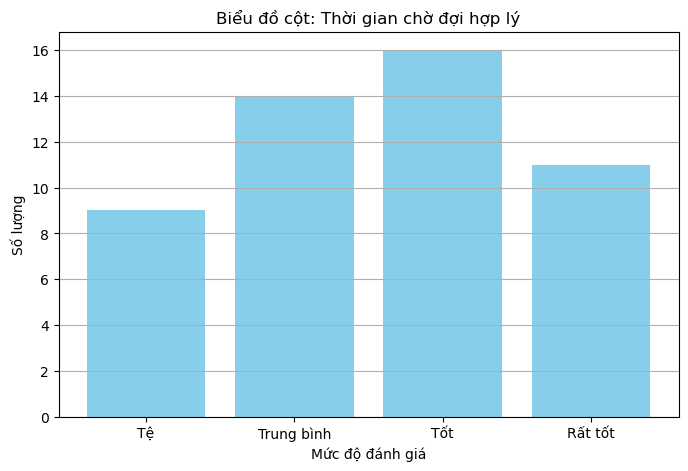

In [20]:

df['Thời gian chờ đợi hợp lý'] = pd.to_numeric(df['Thời gian chờ đợi hợp lý'], errors='coerce')  

# Mapping mã hóa (nếu cần)
mapping = {
    1: 'Rất tệ',
    2: 'Tệ',
    3: 'Trung bình',
    4: 'Tốt',
    5: 'Rất tốt'
}

# Đếm số lượng theo từng mức độ
value_counts = df['Thời gian chờ đợi hợp lý'].value_counts().sort_index()
labels = [mapping[val] for val in value_counts.index]

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Biểu đồ tròn: Thời gian chờ đợi hợp lý")
plt.axis('equal')
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(8, 5))
plt.bar(labels, value_counts.values, color='skyblue')
plt.xlabel("Mức độ đánh giá")
plt.ylabel("Số lượng")
plt.title("Biểu đồ cột: Thời gian chờ đợi hợp lý")
plt.grid(axis='y')
plt.show()


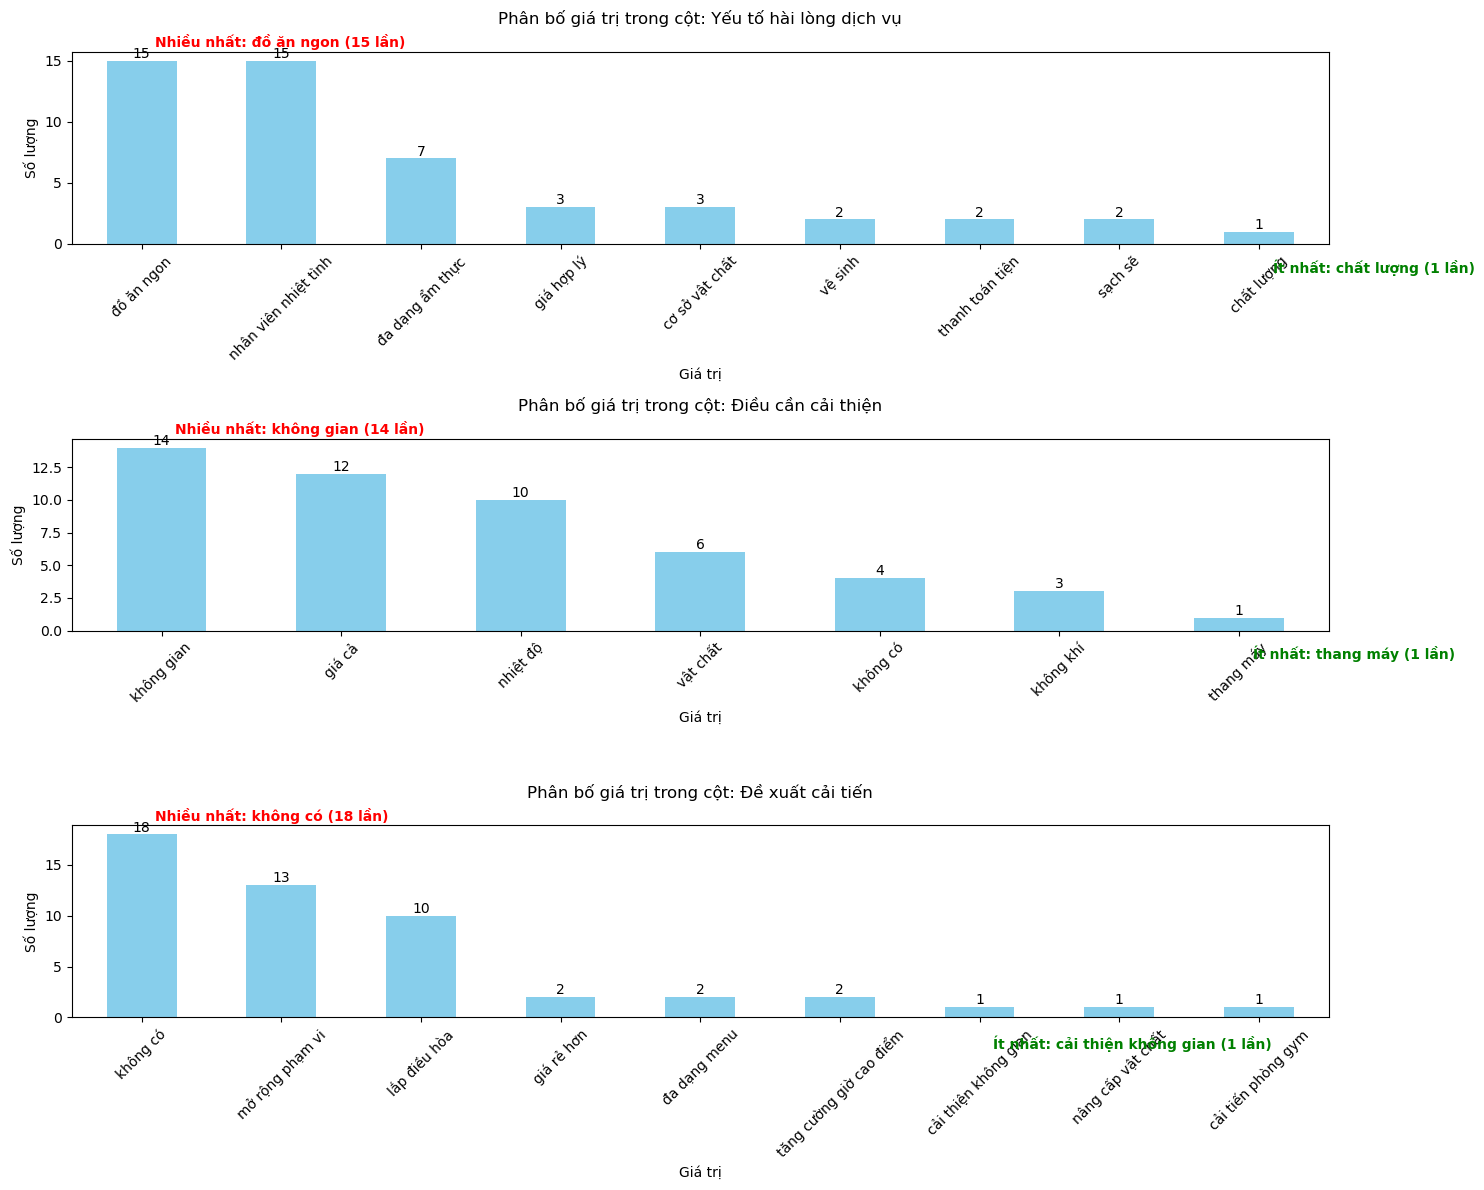

In [12]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(last_three_cols, 1):
    plt.subplot(3, 1, i)
    counts = df[col].value_counts()
    ax = counts.plot(kind='bar', color='skyblue')
    plt.title(f'Phân bố giá trị trong cột: {col}', pad=20)
    plt.xlabel('Giá trị')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    
    # Lấy giá trị và số lần xuất hiện
    max_val = counts.idxmax()
    max_count = counts.max()
    min_val = counts.idxmin()
    min_count = counts.min()
    
    # Hiển thị số lần xuất hiện trên các cột
    for p in ax.patches:
        ax.annotate(str(p.get_height()), 
                   (p.get_x() + p.get_width()/2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 5), 
                   textcoords='offset points')
    
    # Đánh dấu và ghi chú giá trị nhiều nhất và ít nhất
    ax.annotate(f'Nhiều nhất: {max_val} ({max_count} lần)', 
                xy=(counts.index.get_loc(max_val), max_count),
                xytext=(10, 10), textcoords='offset points', 
                color='red', weight='bold')
    
    ax.annotate(f'Ít nhất: {min_val} ({min_count} lần)', 
                xy=(counts.index.get_loc(min_val), min_count),
                xytext=(10, -30), textcoords='offset points', 
                color='green', weight='bold')

plt.tight_layout()
plt.show()

##  KẾT LUẬN PHÂN TÍCH DỮ LIỆU KHẢO SÁT

### 1. Hai tiêu chí có mối tương quan cao nhất:
- **[Tiêu chí QUY TRÌNH VỆ SINH AN TOÀN THỰC PHẨM]** và **[Tiêu chí ĐỒ ĂN NGON]** với hệ số tương quan cao nhất với **[0.62]**.

=> Điều này cho thấy mối liên hệ chặt chẽ giữa hai yếu tố này trong đánh giá của người khảo sát.

### 2.Tiêu chí có điểm trung bình cao nhất:
- **[Tiêu chí HÌNH THỨC THANH TOÁN PHÙ HỢP]**: `[4.52]`

=>  Tiêu chí này được đánh giá tích cực, cho thấy hầu hết mọi người đều hài lòng với hình thức thanh toán của canteen trường .

### 3.Tiêu chí có điểm trung bình thấp nhất:
- **[Tiêu chí Giá cả chất lượng phù hợp với sinh viên]**: `[3.24]`

=> Yếu tố giá cả cần được cải thiện để nâng cao chất lượng dịch vụ.

### 4. Hai yếu tố được khách hàng đánh giá hài lòng nhất:
- **[Đồ ăn ngon]** : 15 lần
- **[Nhân viên nhiệt tình]**: 15 lần

### 5. Hai điều cần cải thiện phổ biến nhất:
- **[Không gian]**: 14 lần
- **[Giá cả]**: 12 lần

### 6. Hai đề xuất cải tiến xuất hiện nhiều nhất:
- **[Mở rộng phạm vi]**: 13 lần
- **[Lắp điều hòa]**: 10 lần

---

###  **Nhận xét tổng quan:**
Dữ liệu cho thấy rằng người khảo sát đánh giá cao ở tiêu chí nhân viên và chất lượng đồ ăn với cả hình thức thanh toán, tuy nhiên cũng chỉ ra một số điểm cần cải thiện, đặc biệt là là tiêu chí không gian canteen. Người khảo sát muốn cải tiến ở tiêu chí Mở rộng phạm vi canteen và lắp điều hòa nhằm mục đích giảm nhiệt độ và độ ngơp không khí bao quanh canteen giờ cao điểm. 
